# Data Mining ACW - Risk Classification

# James Duncan

This Notebook uses records of medical data in order to predict if someone is at risk of a medical condition (Most likely a heart attack) by using models such as Logistical Regression and Neural Networks to predict if someone is a risk or not.

This assignment used The CRISP-DM Model and as such follows the model structure as seen below. 

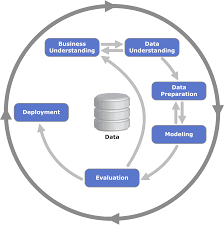

# Methods and Imports

This section of the notebook is dedicated to importing the tools required by the notebook to do the analysis and therefore is not part of the CRISP -DM Structure. It has all the Methods such as Confusion Matrixes and imports required.

## Imports 

Libraries are imported here; key libraries include Pandas for data frames and seaborn for visualisation and other libraries that are required for the data analysis

In [1]:
##############################
#         Import codes       #
##############################

#pip install --user pandas
#pip install --user seaborn
#pip install --user sklearn
#pip install --user pydotplus
#pip install --user Graphviz (Also Install external application(https://www.graphviz.org/download/))

#Graphviz is used as the majority of Decision Trees are plotted using it online

#Data manipulation imports
import pandas as pd #Dataframes
import numpy as np #maths and arrays
from sklearn.model_selection import train_test_split #Data Splitting
from sklearn.metrics import accuracy_score #Accuracy Metric Calulations
from sklearn.metrics import confusion_matrix # Confusion Matrixes 
from sklearn import preprocessing  #label Encoder


#Visualising Imports
import seaborn as sns #Visualising Graphs
import matplotlib.pyplot as plt #Plot Graphs

#Model Imports
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.tree import plot_tree #DecisionTree
from sklearn.externals.six import StringIO #DecisionTree
import pydotplus # used in DecisionTree
from sklearn import tree as tree #DecisionTree
from IPython.display import Image #Export the DecisionTree as a png
from sklearn.neural_network import MLPClassifier #Neural Network
from sklearn.svm import SVC

#Evaluation Imports
from sklearn.model_selection import cross_val_score #Accuracy score of cross validation
from sklearn.model_selection import cross_val_predict # Prediction of a model using Cross Validation
from sklearn.metrics import classification_report #Classification report giving scores of models
from sklearn import metrics #Classification report giving scores of models


c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Confusion Matrixes Method

This method takes the values a confusion matrix would normally take (YTrue Value, YPredicted Value) and outputs a visualised confusion  matrix (Like the one below). This method also allows for quick normalisation of the confusion matrixes generated. 

![Matrix](https://miro.medium.com/max/339/1*EXpZRtO47GP_wI-jLLPRQg.png)

In [2]:
#Code taken and editied to make confusin matrixes look cleaner than an array 
#Additionally used for easy normalisation of confusion matrixes data
#(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) 
#Labels edited for the classification required by this data



classes = ["Risk","NoRisk"] #set clasess for data analysing 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title: #sets title of confustion matrix if there isnt one
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # set confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data bhased on the set class data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


## Decision Tree Method

This method is used to plot a Decision Tree in the modelling phase of CRISP-DM it takes in the model and the names of the data in order to plot the Decision tree and output as a png. An example of a tree generated using this method is displayed below. 

![Tree](https://i.stack.imgur.com/JQpzN.png)

In [3]:
#Code taken from Bhavesh Bhatt in his video about plotting Desision trees using Graphviz - https://www.youtube.com/watch?v=0V4c4pOP9BM

def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

## Import data

The dataset is loaded here using pandas in order to be manipulated and analysed.

In [4]:
MedicalRecords = pd.read_csv("600092_data.csv").copy() # Importing csv
MedicalRecordsWorkingCopy = MedicalRecords.copy() #make a copy of the data

MedicalRecordsWorkingCopy.head() #Display the top 5 records

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


# Data Preparation

In this stage the data loaded above is cleaned and prepared for modelling. 

The current data is unclean and not ready for modelling and a lot of inaccuracies will have been fixed to align with the provided data specification. Additionally, a lot of what we know about the data is limited so correlations have been visualised to help prove and project my theories from the previous stage. Specifically, I wanted to look at IPSI and Contra as they seem to affect the Risk label.

## Data Cleaning

In Data Cleaning the data is analysed against the provided data specification in order to make it match and be valid for modelling and predicting. During data collection the data might have collected values outside the data specification, specifically Null/NaN values that where never provided. This data will either need to be dropped or imputed/changed for modelling.  

###  Check for Null Values

Check the current values of the data. As you can see below some of the values have NaNs and Some have values that are invalid to our data specification.

In [5]:
#Pandas Unique Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

#Check the values of Indication
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
#Check the values of IHD
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
#Check the values of Arrhythmia
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
#Check the values of History
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
#Check the values of IPSI
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
#Check the values of Contra
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
#Check the values of label
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Indication are: ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes' nan] 

Values of IPSI are: [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

Values of Contra are: ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' ' '
 '10' '20' '65'] 

Values of label are: ['NoRisk' 'Risk' 'Unknown' nan] 



Display the NaNs of Indication

In [6]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication'].isnull()] #3 Null Values in Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
822,0.211760,205845,NaN,no,yes,no,no,no,80.0,100,Risk
1007,0.761219,256076,NaN,no,no,no,yes,yes,99.0,100,Risk


Display the NaNs of Diabetes

In [7]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Diabetes'].isnull()] #2 Null Values in Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


Display the NaNs of Hypertension

In [8]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Hypertension'].isnull()] # 3 Null values in Hypertension

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
983,0.319215,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk


Display the NaNs of History

In [9]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['History'].isnull()] #2 Null Values in History

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk


Display the NaNs of IPSI

In [10]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['IPSI'].isnull()] #4 Null values in ISPI

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
845,0.920096,104176,CVA,no,no,no,no,no,NaN,20,NoRisk
916,0.004501,281679,A-F,no,no,no,no,no,NaN,50,NoRisk


Display the NaNs of label

In [11]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'].isnull()] #3 Null Values in Label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,0.756938,190671,CVA,no,yes,yes,no,no,76.0,50,NaN
974,0.923418,165432,CVA,no,yes,yes,yes,no,80.0,70,NaN
1418,0.813102,169726,TIA,yes,no,no,no,yes,90.0,50,NaN


Find any Unknown Values as Unknown Values are Essentially the same as Null, the data description provided states there should only be Risk and NoRisk

In [12]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label']=="Unknown"] #2 Values Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


Find any Blank Values as Blank Values are Essentially the same as Null, the data description provided states there should only be ints here

In [13]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "] #1 Value Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk


20/1520 Identified as Null/Unknown/Blank which is 1.3% of the whole dataset, this is very small dropping these values may be the best option as imputing them may cause the data to be less accurate later on. This is displayed below on the pie chart. 

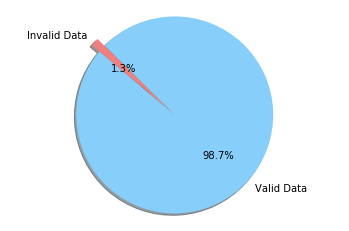

In [14]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

#Display a pie chart showing the impact of dropping the values

labels = 'Valid Data', 'Invalid Data' # set the titles for each section
sizes = [1500, 20] # Set the values, 20 dropped, 1500 Valid Records 
colors = ['lightskyblue', 'lightcoral'] #set the colours 
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140) #set the angles

plt.axis('equal')
plt.show() #show the pie chart

#### Drop the Records

In [15]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Indication"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Diabetes"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Hypertension"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["History"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["IPSI"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["label"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'] == "Unknown"].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy.head() #Display the top 5 results


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


### Check Data Types

The values of the data are important but so is the type of the data. if a data type is wrong our models might predict something wrong so it’s important to correct any inaccuracies in the data. 

Therefore, the code below checks if the data types line up with the data description given if not changes them to be accurate to the data description.


In [16]:
#dtypes documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
MedicalRecordsWorkingCopy.dtypes #Check the data types

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

IPSI is stated to be an Int in the data description however it is currently a float, this should be changed 

In [17]:
#change IPSI from Object to Int
MedicalRecordsWorkingCopy['Contra'] = MedicalRecordsWorkingCopy['Contra'].astype(int)
#display the data types to show the changed data types
MedicalRecordsWorkingCopy.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra            int32
label            object
dtype: object

Contra is stated to be an Int in the data description however it is currently an object, this should be changed

In [18]:
#Pandas astype Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
MedicalRecordsWorkingCopy['IPSI'] = MedicalRecordsWorkingCopy['IPSI'].astype(int) #change IPSI from float to Int

### Values in Indication 

As found above when checking for Null/NaN values there are two versions of ASX, one of them called "Asx" and the other called "ASx".

Which one is correct? 

The data specification has it in full lower case ("asx") however, the rest of the indication values are in full upper case ("ASX"). Additionally, doing further research I came across the term on the medical dictionary(https://medical-dictionary.thefreedictionary.com/Asx) that has it as "Asx" which is in my data. 

This type of problem could be ironed out with some contact with the business as this may have been a simple error in the data collection or storage. Unfortunately this ACW does not have any outside contact with the business so therefore this cannot be checked. 

As this value cannot be checked I have changed it to what I feel is the most accurate value which is the medical dictionary value.

Both versions have been printed below before the value of "ASx" is changed to "Asx"





Display the values of "Asx"

In [19]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head() #check the values of "Asx"

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
68,0.549947,113727,Asx,yes,yes,yes,no,no,75,100,Risk
111,0.171185,95883,Asx,yes,yes,yes,yes,no,99,75,Risk
131,0.511954,95004,Asx,no,yes,yes,yes,no,75,100,Risk
172,0.209577,84632,Asx,yes,yes,yes,no,no,90,95,Risk
177,0.895377,230462,Asx,no,yes,yes,yes,no,80,53,Risk


Display the values of "ASx"

In [20]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="ASx"].head() # Check the values of "ASx"

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,ASx,no,yes,yes,yes,no,90,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80,80,Risk
21,0.981939,217006,ASx,no,yes,no,no,no,80,75,NoRisk
22,0.890427,184827,ASx,no,no,yes,no,no,85,10,NoRisk
57,0.723126,254427,ASx,no,yes,no,no,no,76,50,NoRisk



Change "ASx" to "Asx"

In [21]:
#Pandas Replace Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.replace('ASx','Asx') #Replace "ASx" data with "Asx"
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head() #Display the top 5 Results

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,Asx,no,yes,yes,yes,no,90,100,Risk
19,0.065821,101248,Asx,yes,no,yes,no,no,80,80,Risk
21,0.981939,217006,Asx,no,yes,no,no,no,80,75,NoRisk
22,0.890427,184827,Asx,no,no,yes,no,no,85,10,NoRisk
57,0.723126,254427,Asx,no,yes,no,no,no,76,50,NoRisk


### Data Duplication

ID and Random should also be checked in order to ensure that the data is the same as stated in the data dictionary

In [22]:
#Pandas is_unique is different from Unique, Returns bool values
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_unique.html

#Check if the value of "Random" is unique
print ("Is Random truly unique to each record:",MedicalRecordsWorkingCopy['Random'].is_unique,"\n")
#Check if the value of "Id" is unique
print ("Is Id unique to each record:",MedicalRecordsWorkingCopy['Id'].is_unique)

Is Random truly unique to each record: False 

Is Id unique to each record: True


The Data Dictionary states that Random is a completely unique value however, as seen above the data repeats itself, but Id is completely unique. Is the data wrong or the values value names in the wrong order? 

it is highly probable that the value names are the wrong way around and as you can see by the bar chart below you can see how many times a patient visited a hospital if "Random" was "ID". This could be ironed out if contact with the outside company was established. Below you can see that "Random" is probably how many times someone visited the hospital.


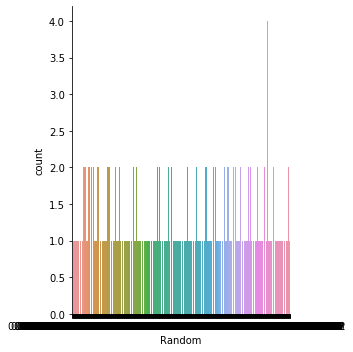

In [23]:
#Plot a bar chart showing how many patients visted twice or more
#Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot("Random",data = MedicalRecordsWorkingCopy, kind = 'count') 

### Should I Drop the Duplicates?

Dropping the duplicates (patients that visited more than once) would drop a significant portion of the data (as seen below) so the datasets accuracy might be severely affected later on in the process. Additionally, considering I’m only predicting if a Patient is a Risk or not I don't mind having duplicates in my data as this will not affect my end classification.

Number of duplicated records 289


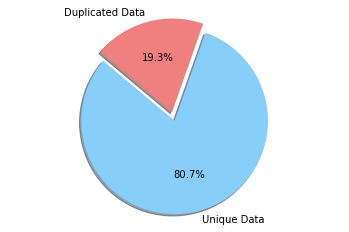

In [24]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

count = 0 #Declare a count varible
DuplicatedNo = MedicalRecordsWorkingCopy['Random'].duplicated() #check what values are duplicated
for x in DuplicatedNo: #for every value is Duplicated true 
    if x == True:
        count = count + 1 #if true add 1 to duplicate count
        
print("Number of duplicated records",count) #Print the number of duplicates


labels = 'Unique Data', 'Duplicated Data' #Label the segments 
sizes = [1211, 289] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show() #show the chart

### Check if data is fully clean

This data should now have been fully cleaned and  should align with the given data description. I can now move on to finding any correlations in the data and make accurate predictions on what I think the key variables that affect whether someone is a Risk or not.

In [25]:
#Pandas Unique Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
#Check the values of Indication
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
#Check the values of IHD
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
#Check the values of Arrhythmia
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
#Check the values of History
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
#Check the values of IPSI
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
#Check the values of Contra
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
#Check the values of label
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

print(MedicalRecordsWorkingCopy.dtypes)

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'Asx'] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes'] 

Values of IPSI are: [78 70 95 90 75 81 80 76 82 85 68 50 73 99 71 65 74 98 97 60 67 79 77 84
 55 35 51 69 72] 

Values of Contra are: [ 20  60  40  85  95 100  50  30  80  25  75  10  70  15  35  55  90  79
  45  65  62  53  51  16  73] 

Values of label are: ['NoRisk' 'Risk'] 

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI              int64
Contra            int64
label            object
dtype: object


### What Values are Required for classification?

Most values in this data set are needed for the classification as they have meaning and could affect the outcome. However, Id and Random don't actually matter as they are identifiers for the data knowing who someone is won't affect the end result, for that reason I have dropped these 2 columns.

Indication has also been split up to allow for correlations between the situations that hospitalised the patient. 


#### Drop the columns 

In [26]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Id','Random'])#Drop ID and Random
MedicalRecordsWorkingCopy.head()#Display the top 5 Results

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78,20,NoRisk
1,TIA,no,no,no,no,no,70,60,NoRisk
2,A-F,no,yes,yes,no,no,95,40,Risk
3,TIA,no,no,yes,no,no,90,85,Risk
4,CVA,no,no,no,no,no,70,20,NoRisk


#### Split the Indication values into four columns to allow for correlations between the conditions

In [27]:
#Get_Dummies Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

#Get the independant columns for Indication and split it up
dummiesIndication = MedicalRecordsWorkingCopy["Indication"].str.get_dummies(" ") 
#Drop the original Indication Data
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Indication'])
#data to concatanate
frames = [MedicalRecordsWorkingCopy,dummiesIndication] 
#concated data
MedicalRecordsWorkingCopy = pd.concat(frames, axis=1) 
MedicalRecordsWorkingCopy.head() #Display the top 5 result

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,A-F,Asx,CVA,TIA
0,no,no,yes,no,no,78,20,NoRisk,1,0,0,0
1,no,no,no,no,no,70,60,NoRisk,0,0,0,1
2,no,yes,yes,no,no,95,40,Risk,1,0,0,0
3,no,no,yes,no,no,90,85,Risk,0,0,0,1
4,no,no,no,no,no,70,20,NoRisk,0,0,1,0


### Finding Correlations

Finding Correlations in the data is important as it shows where one data variable (IPSI, Contra, Diabetes ...etc) may affect another variable in the data. This is important for this data as knowing what data affects someone who is at risk is key to predicting is someone new has a risk or not. 

I can then compare my predictions as to what’s important to what my models think are important.

Values need to be numbers in order to find the correlation values of the data, therefore a copy of the data has been made and some values have been replacing by dummies (one hot encoding). Label encoder from sklearn was used as it was easier to set all of the values to binary digits, Get dummies was used when I wanted to split the values into  separate columns.


In [28]:
#Create a copy of the Medical Records dataset for correlations 
MedicalRecordsDummies = MedicalRecordsWorkingCopy.copy()
#Display the top 5 results
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,A-F,Asx,CVA,TIA
0,no,no,yes,no,no,78,20,NoRisk,1,0,0,0
1,no,no,no,no,no,70,60,NoRisk,0,0,0,1
2,no,yes,yes,no,no,95,40,Risk,1,0,0,0
3,no,no,yes,no,no,90,85,Risk,0,0,0,1
4,no,no,no,no,no,70,20,NoRisk,0,0,1,0


Split label into Risk and NoRisk to see what impacts a Risk and NoRisk independently

In [29]:
#Get_dummies Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

#Get the dummies of the labels set splitting NoRisk and Risk up into two columns
dummiesLabel = MedicalRecordsDummies["label"].str.get_dummies(" ") 
#Drop the original label data
MedicalRecordsDummies = MedicalRecordsDummies.drop(columns=['label'])
#data to concatanate
frames = [MedicalRecordsDummies,dummiesLabel] 
#concated data
MedicalRecordsDummies = pd.concat(frames, axis=1) 

Turn the values into numerical values so .corr() and models can calculate correlations and predictions. 

In [30]:
#Sklearn LabelEncoder Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

#create label encoder object to use on data
le = preprocessing.LabelEncoder() 

#Transform Diabetes into binary numerical value
MedicalRecordsDummies['Diabetes'] = le.fit_transform(MedicalRecordsDummies['Diabetes'])
#Transform IHD into binary numerical value
MedicalRecordsDummies['IHD'] = le.fit_transform(MedicalRecordsDummies['IHD'])
#Transform Hypertension into binary numerical value
MedicalRecordsDummies['Hypertension'] = le.fit_transform(MedicalRecordsDummies['Hypertension'])
#Transform Arrhythmia into binary numerical value
MedicalRecordsDummies['Arrhythmia'] = le.fit_transform(MedicalRecordsDummies['Arrhythmia'])
#Transform History into binary numerical value
MedicalRecordsDummies['History'] = le.fit_transform(MedicalRecordsDummies['History'])
#Display the top 5 values
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
0,0,0,1,0,0,78,20,1,0,0,0,1,0
1,0,0,0,0,0,70,60,0,0,0,1,1,0
2,0,1,1,0,0,95,40,1,0,0,0,0,1
3,0,0,1,0,0,90,85,0,0,0,1,0,1
4,0,0,0,0,0,70,20,0,0,1,0,1,0


### Plot the correlations

The correlations between the data varibles can then be plotted out into a table then a heatmap showing what varible has a correlation to another


In [31]:
#Pandas corr Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

MedicalRecordsCorr = MedicalRecordsDummies.corr() #Plot correlations
MedicalRecordsCorr#Display correlations

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
Diabetes,1.000000,0.064017,0.164368,0.095624,-0.002545,0.158694,0.188610,-0.009462,0.036593,-0.050563,0.032132,-0.285510,0.285510
IHD,0.064017,1.000000,0.137069,0.168570,-0.071391,0.090221,0.113951,0.049031,0.017554,-0.002756,-0.063760,-0.252071,0.252071
Hypertension,0.164368,0.137069,1.000000,0.289896,-0.073294,0.089246,0.113192,-0.101607,0.060377,0.080493,-0.021376,-0.387746,0.387746
Arrhythmia,0.095624,0.168570,0.289896,1.000000,0.003544,0.391332,0.496099,0.043948,0.099263,0.128973,-0.257589,-0.706442,0.706442
History,-0.002545,-0.071391,-0.073294,0.003544,1.000000,-0.000118,0.103961,-0.061189,-0.050040,0.000382,0.105230,0.003921,-0.003921
IPSI,0.158694,0.090221,0.089246,0.391332,-0.000118,1.000000,0.317034,0.151534,0.062849,-0.024505,-0.187714,-0.490566,0.490566
Contra,0.188610,0.113951,0.113192,0.496099,0.103961,0.317034,1.000000,-0.001670,0.020183,0.057459,-0.072738,-0.649821,0.649821
A-F,-0.009462,0.049031,-0.101607,0.043948,-0.061189,0.151534,-0.001670,1.000000,-0.285248,-0.424391,-0.410811,-0.117663,0.117663
Asx,0.036593,0.017554,0.060377,0.099263,-0.050040,0.062849,0.020183,-0.285248,1.000000,-0.250283,-0.242275,-0.128898,0.128898
CVA,-0.050563,-0.002756,0.080493,0.128973,0.000382,-0.024505,0.057459,-0.424391,-0.250283,1.000000,-0.360455,0.018023,-0.018023


The following heatmap shows the correlation and their values 

if the correlation has a positive value (0 - 1) the correlation is positive therefore as something goes up the other thing goes up. if it has a negative value (-1 - 0) then the correlation is negative which suggests that the value goes down as the other value goes down.

The strength of the correlation is how close to 1 (in negatives case 0) the correlation is. 

the heatmap below shows strong correlations between the following

###### Arrhythmia - Risk (Very Strong Correlation)

###### Contra - Risk (Strong Correlation)

###### IPSI - Risk (Strong Correlation)




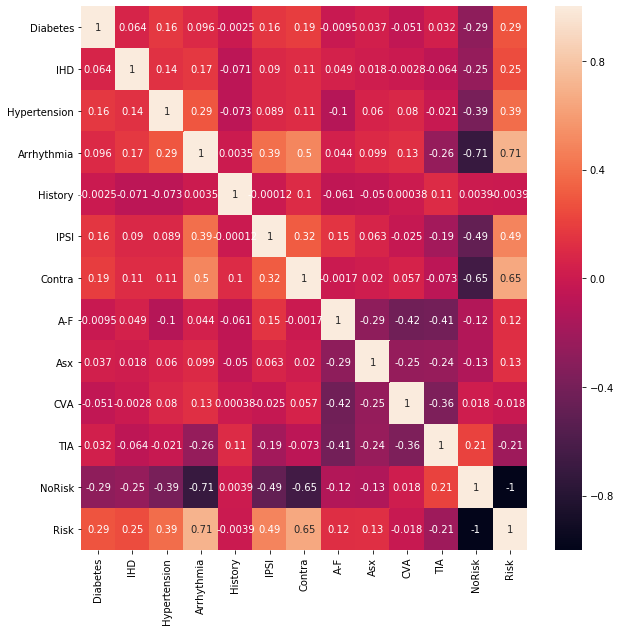

In [32]:
#Seaborn Heatmap Documentation - https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig, ax = plt.subplots(figsize=(10,10)) #Increase heatmap size  
sns.heatmap(MedicalRecordsCorr,annot=True) #Display heatmap

These Correlations can be visualised as part of a scatterplot (Pairplot) that shows the trend of the variables. for example, if the patient has a high contra then the chance someone is a risk is higher which I predicted before analysing the data.

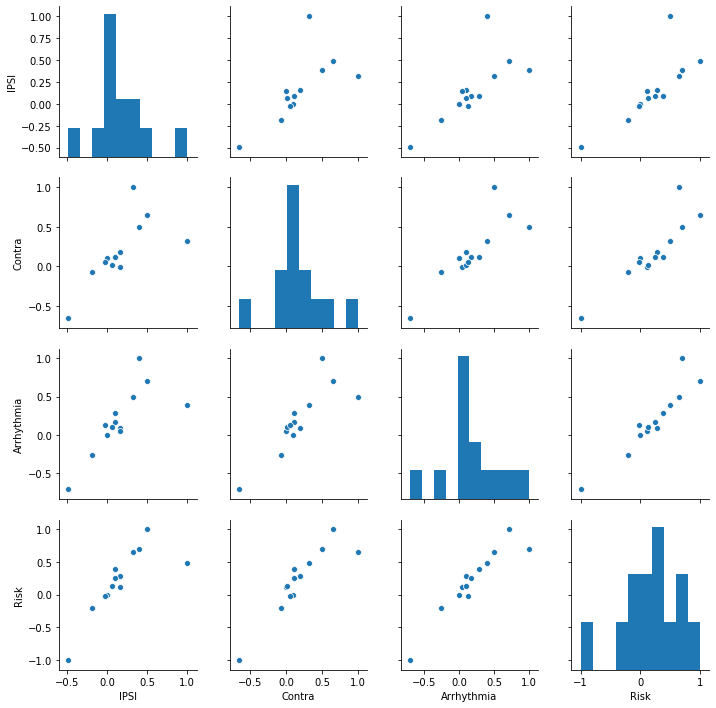

In [33]:
#Seaborn Pairplot Documentation - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(MedicalRecordsCorr,vars = ['IPSI','Contra','Arrhythmia','Risk'] )#Display Pairplot correlations

The below pairplot shows the variables of people that are a risk depending on the variable in question.

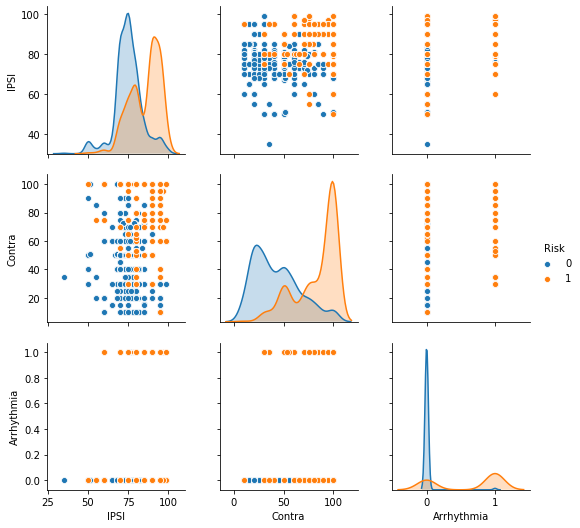

In [34]:
#Seaborn Pairplot Documentation - https://seaborn.pydata.org/generated/seaborn.pairplot.html
#Display Pairplot correlations
sns.pairplot(MedicalRecordsDummies,vars = ['IPSI','Contra','Arrhythmia'], hue="Risk" )

### Visualise the Correlations

The plot below seems to support the correlation between IPSI and Risk, as the IPSI number increases the chance you are a risk also increases. This is by no means a certain stat as some at 99 IPSI are not a risk.

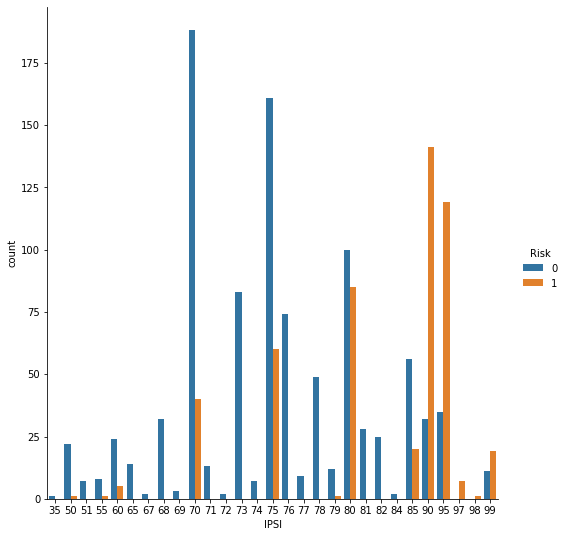

In [35]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsIPSICorr = sns.catplot("IPSI",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk') 
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsIPSICorr.fig.set_size_inches(8,8)

The plot below seems to support the correlation between Contra and Risk, as the Contra number increases the chance you are a risk also increases. This correlation is particularly strong as when someone has 100%, they have a very high chance of being a risk.

As with the IPSI and Risk this is by no means certain as there are people that have 100% contra but are not at Risk


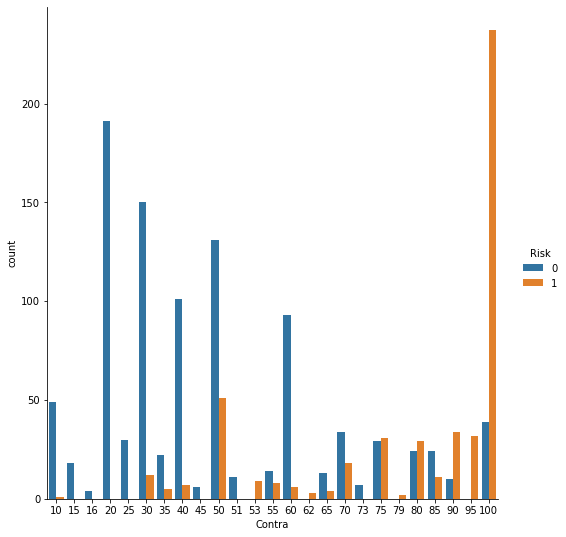

In [36]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsContraCorr = sns.catplot("Contra",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsContraCorr.fig.set_size_inches(8,8)

The plot below seems to support the very strong correlation between Arrhythmia and Risk, if the patient has Arrhythmia the chance you are a risk significantly increases.

As with the other correlations it’s not certain as some people have Arrhythmia but are not a risk and people that have it that are not a risk


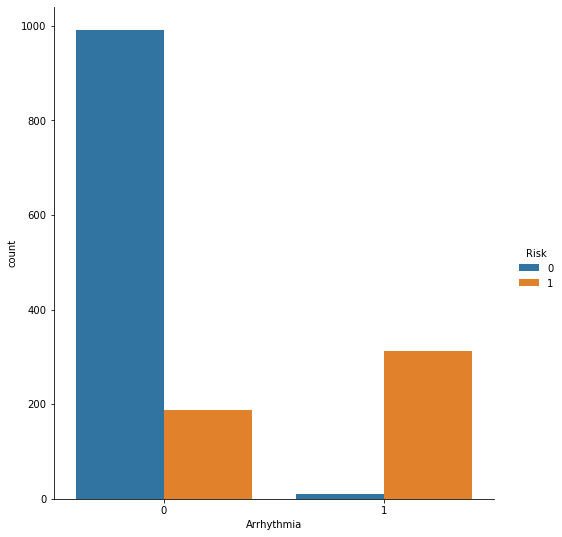

In [37]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsArrhythmiaCorr = sns.catplot("Arrhythmia",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsArrhythmiaCorr.fig.set_size_inches(8,8)

### Look for any outliers that may be skewing the correlations 

The boxplot below shows the outliers in IPSI, there are only 3 of them which is not large enough to skew the results of the correlation. I am also not going to drop these values as they still could be valid data that can be used to train a model.

The reason they may be there is because the data of IPSI does not have an even spread so the people at low IPSI are outliers.


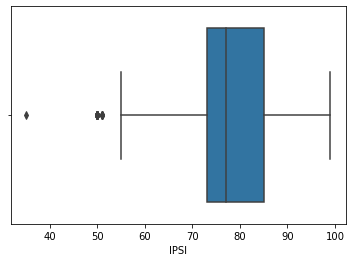

In [38]:
#Seaborn boxplot Documentation - https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x = "IPSI",  data = MedicalRecordsDummies) #Display a boxplot of IPSI

The reason there are outliers is probably due to the fact the data is skewed to the higher values which means that the outliers are probably correct values.

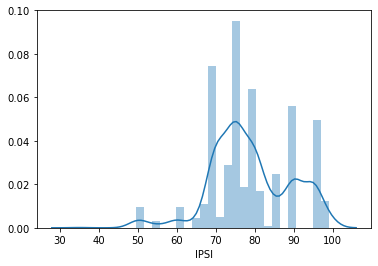

In [39]:
#Seaborn Displot Documentation - https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(MedicalRecordsDummies['IPSI'])#Display a Dsiplot of IPSI

Unlike IPSI, Contra has no outliers so any results can not be skewed. This is also reflected by the wide spread of data values in the distplot. 


Additionally, plotting Arrhythmia wouldn’t show any outliers as the data was a clean boolean

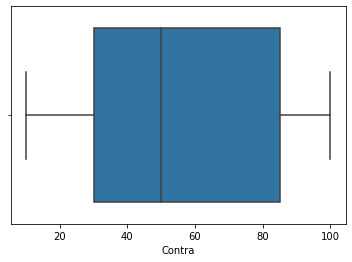

In [40]:
#Seaborn boxplot Documentation - https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x = "Contra", data = MedicalRecordsDummies)#Display a boxplot of Contra

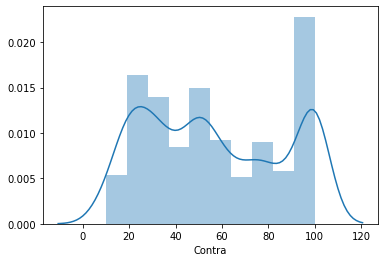

In [41]:
#Seaborn Displot Documentation - https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(MedicalRecordsDummies['Contra'])#Display a Dsiplot of Contra

# Modeling

The modelling stage is where you use your data and a model to predict an outcome. 

In this stage the data is split up into two different sections the "x" data all of the variables except the y dataset and the "y" Dataset which is the target (if someone is a risk or not). This data is then split into 2 different sets; the test set and the training set into a 70%/30% split of the data.

the output of the splits should be as follows:
xTrain = 70% of the x data records
xTest = 30% of the x data records
yTrain = 70% of the y data records
yTest = 30% of the y data records

Models can then be trained on the training test set and tested on the test set. This is known as the hold-out method where there is data the model never sees. 

Models are also tested using Kfold Cross validation instead of the hold out method. Kfold takes into account the whole data set and generates an accuracy based on the whole dataset. This is very useful to validate that my split from hold-out is working as intended. 

Additional metrics are also generated such as Confusion matrixes and Classification Reports.


### Prepare for Modelling

Prepare for modelling by copying the cleaned data set and one hot encoding (label encoding/get dummies) the required attributes. All the values have to be numeric or our model won’t take the values in. Aditionally IPSI and Contra have been normlaised to improve the accuracy of the models. 

In [42]:
#Sklearn LabelEncoder Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

ModelCopy = MedicalRecordsWorkingCopy.copy() #Make a copy for models

ModelCopy.rename(columns={'label': 'Risk'}, inplace=True) #Rename the column label to risk

ModelCopy['Risk'] = le.fit_transform(ModelCopy['Risk']) #turn Risk into a binary value
ModelCopy['Diabetes'] = le.fit_transform(ModelCopy['Diabetes'])#turn Diabetes into a binary value
ModelCopy['IHD'] = le.fit_transform(ModelCopy['IHD'])#turn IHD into a binary value
ModelCopy['Hypertension'] = le.fit_transform(ModelCopy['Hypertension'])#turn Hypertension into a binary value
ModelCopy['Arrhythmia'] = le.fit_transform(ModelCopy['Arrhythmia'])#turn Arrhythmia into a binary value
ModelCopy['History'] = le.fit_transform(ModelCopy['History'])#turn History into a binary value

ModelCopy.head() #Display the top 5 Values

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,0,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,0,1
2,0,1,1,0,0,95,40,1,1,0,0,0
3,0,0,1,0,0,90,85,1,0,0,0,1
4,0,0,0,0,0,70,20,0,0,0,1,0


In [43]:
#TonormaliseContra = ModelCopy['Contra'].to_numpy()

#TonormaliseContra= np.asarray(TonormaliseContra).reshape(-1,1)
#ModelCopy['Contra'] = preprocessing.normalize(TonormaliseContra,axis =0)
#TonormaliseIPSI = ModelCopy['IPSI'].to_numpy()

#TonormaliseIPSI= np.asarray(TonormaliseContra).reshape(-1,1)
#ModelCopy['IPSI'] = preprocessing.normalize(TonormaliseContra,axis =0)
#ModelCopy.head()

 Split the data into X (All Varibles Except Risk)  and Y (Risk) data. 

In [44]:
MedicalRecordsRisk = ModelCopy[['Risk']] #get the Risk Column as a new DataFrame
MedicalRecordsRiskArray = MedicalRecordsRisk.to_numpy()
MedicalRecordsRisk.head()#Display the top 5 Values

,Risk
0,0
1,0
2,1
3,1
4,0


In [45]:
ModelCopy = ModelCopy.drop(columns=['Risk']) #Drop the Risk Column
ModelCopy.head()#Display the top 5 Values

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,1
2,0,1,1,0,0,95,40,1,0,0,0
3,0,0,1,0,0,90,85,0,0,0,1
4,0,0,0,0,0,70,20,0,0,1,0


Split the data into training and test splits at a 70%/30% ratio

In [46]:
#Sklearn Train_test_Split Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#Split the data into the test sets
xTrain, xTest,yTrain,yTest = train_test_split(ModelCopy,MedicalRecordsRisk, test_size = 0.30, shuffle = False)

These splits are visualised below to ensire the data has correctly split 


Y Data Visualisation

Number of records in training set: Risk    1050
dtype: int64
Number of records in training set: Risk    450
dtype: int64


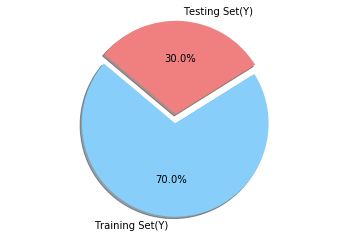

In [47]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

print("Number of records in training set:",yTrain.count()) #Retreive the count of yTrain dataset
print("Number of records in training set:", yTest.count()) #Retreive the count of yTest dataset


labels = 'Training Set(Y)', 'Testing Set(Y)' #Label the segments 
sizes = [1050, 450] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')#show the chart
plt.show()

X data visualisation

Number of records in training set: Diabetes        1050
IHD             1050
Hypertension    1050
Arrhythmia      1050
History         1050
IPSI            1050
Contra          1050
A-F             1050
Asx             1050
CVA             1050
TIA             1050
dtype: int64
Number of records in Testing set: Diabetes        450
IHD             450
Hypertension    450
Arrhythmia      450
History         450
IPSI            450
Contra          450
A-F             450
Asx             450
CVA             450
TIA             450
dtype: int64


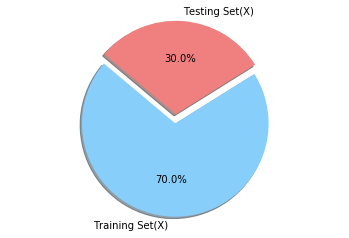

In [48]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

print("Number of records in training set:",xTrain.count()) #Retreive the count of xTrain dataset
print("Number of records in Testing set:", xTest.count()) #Retreive the count of xTest dataset


labels = 'Training Set(X)', 'Testing Set(X)' #Label the segments 
sizes = [1050, 450] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')#show the chart
plt.show()

## Logistical Regression

Logistical regression was used instead of Linear Regression as Linear is not great for classifying values and deals with exponential data. Logistical regression however is built for classification (Classification model) and will allow predictions of Risk and No Risk.

Linear Regression was tested however it was replaced by this model as linear regression did not allow me to plot all of the required metrics and was only achieving a cross validation accuracy score of 73% which is close to my null accuracy. 

Logistical Regression works by fitting a line shaped like an "S" between Risk and No Risk then you can plot different variables along the line and find where it meets. if the variable meets the line in the top half then it’s probably a risk if not then it’s probably No Risk


![LinearVsLogistic](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Model is created

Hyperparameters Tweaked: 
    
    
Hyperparameters Results:


In [49]:
#Logistic Regression Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Create the model
LogisticRegressionModel = LogisticRegression(solver = 'lbfgs' ,max_iter = 10000, multi_class="auto") #Accuracy 90.2%

YtestarrayLogisticRegression = yTest.to_numpy().flatten() #create arrays of data
YtrainarrayLogisticRegression = yTrain.to_numpy().flatten()#create arrays of data


In [50]:
LogisticRegressionModel = LogisticRegression(solver = 'lbfgs',max_iter = 10000, multi_class="auto",penalty = 'none') 
#accuracy 92.8

In [51]:
LogisticRegressionModel = LogisticRegression(solver = 'lbfgs',max_iter = 10000, multi_class="auto",penalty = 'none',class_weight = 'balanced') 
#accuracy 94

Model is trained on 70% of the data (Train data set) 

In [52]:
#Logistic Regression Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Fit the Logistic Regression Model
LogisticRegression = LogisticRegressionModel.fit(xTrain, YtrainarrayLogisticRegression)

Model then can predict the results of y depending on the x data it has been given

In [53]:

#use the model to predict the data
yPredtestLogisticRegression = LogisticRegressionModel.predict(xTest)

Predictions are then stored in this dataframe as an example of what the model has predicted

In [54]:
#place the predicted data and the real data in the dataframe
LogisticRegressionPrediction = pd.DataFrame({'Actual': YtestarrayLogisticRegression, 'Predicted': yPredtestLogisticRegression})
LogisticRegressionPrediction.head() #Display the top 5 Values

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


An accuracy score is then generated for the model which can be compared against the cross validated accuracy score and variance.

Cross Validation also known as Kfold takes all of the data and splits it up into 10 folds (the standard) then tests the model based on how well it performs on all of the folds of data. The mean of these results is the cross-validation accuracy score and the variance is the amount of difference from the worst performing fold to the best performing fold. This is used in all future models.


In [55]:
#Sklearn Cross_Val_score documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
#split into 10 folds and get the score

LogisticRegressionAccuracy = accuracy_score(YtestarrayLogisticRegression,yPredtestLogisticRegression)
LogisticRegressionCrossVal = cross_val_score(LogisticRegressionModel,ModelCopy, MedicalRecordsRiskArray.flatten(), cv=10)

print("Accuracy of Model (Logistic Regression)",LogisticRegressionAccuracy)
print ("Cross Validation Accuracy Score(Logistic Regression):" ,round(np.average(LogisticRegressionCrossVal),2)) #print the accuracy 
print("Cross Validation Varience(Logistic Regression): ",round(LogisticRegressionCrossVal.std()*2,2),"\n") #print the standard deviation


Accuracy of Model (Logistic Regression) 0.9555555555555556
Cross Validation Accuracy Score(Logistic Regression): 0.98
Cross Validation Varience(Logistic Regression):  0.04 



Confusion Matrixes can then be plotted to see how the model performed. False positive values are the worst as if a model predicts someone doesn't have cancer and they actually do then our model could have resulted in someone dying.

These can be generated by both my model’s prediction and my kfold/Cross validation's prediction, this allows us to see where the model is failing and by how much it is failing by.

These are used in all future models.


![ConfusionMatrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

Find the cross validation predicted values

In [56]:
#sklearn cross_val_predict documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
yPredCrossValLogisticRegression = cross_val_predict(LogisticRegressionModel, xTest, YtestarrayLogisticRegression, cv=10)

Confusion matrix, without normalization
[[288  12]
 [  8 142]]


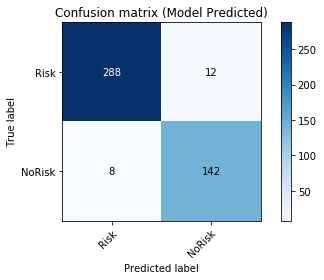

In [57]:
plot_confusion_matrix(YtestarrayLogisticRegression, yPredtestLogisticRegression, classes=classes, title='Confusion matrix (Model Predicted)')

Confusion matrix, without normalization
[[287  13]
 [  5 145]]


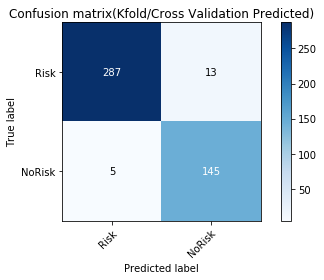

In [58]:
#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarrayLogisticRegression, yPredCrossValLogisticRegression, classes=classes, title='Confusion matrix(Kfold/Cross Validation Predicted)')

You can also use the predicted data of both the cross validation and model to find the precision value (how many times the model correctly predicts a positive value out of all the positive values) and the recall value ( how many times the model gets something right through all the data)

This additionally generates F1-score which is the average of both  the precision and recall values. These are yet more metrics that can show where the model is succeeding or failing.


In [59]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
 
print("Model Predictions \n")

#Generate classifcation report 
LogisticRegressionReportNormal = classification_report(YtestarrayLogisticRegression, yPredtestLogisticRegression)
print(LogisticRegressionReportNormal)

Model Predictions 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       300
           1       0.92      0.95      0.93       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



In [60]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Cross Validation Predictions \n")

#Generate classifcation report 
LogisticRegressionReport = classification_report(YtestarrayLogisticRegression, yPredCrossValLogisticRegression)
print(LogisticRegressionReport)

Cross Validation Predictions 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.92      0.97      0.94       150

    accuracy                           0.96       450
   macro avg       0.95      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



## Decision Tree

Decision Tree is used as it allows the data to be split evenly down to a conclusion. it does this by taking the data and splitting it at different areas of the data. it calculates where the best split is and splits the data down. 

The tree makes use of Gini impurity to see how impure the fata is its highly impure it may decide this is the best place to split the data into the next branch. Eventually the tree will classify the data as risk, or no risk based on the outcomes and decisions it makes.

This is Visualised using the medical data below


Model is created

Hyperparameters Tweaked: 
    
    
Hyperparameters Results:


In [61]:
#Decision Tree Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Declare a decision tree model
DecisionTreeModel = tree.DecisionTreeClassifier(max_depth = 5,class_weight = "balanced")

Model is trained on 70% of the data (Train data set) 

In [62]:
#Decision Tree Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Fit the model
DecisionTreeModel = DecisionTreeModel.fit(xTrain, yTrain)

Display the Decision tree (double click to see bigger)

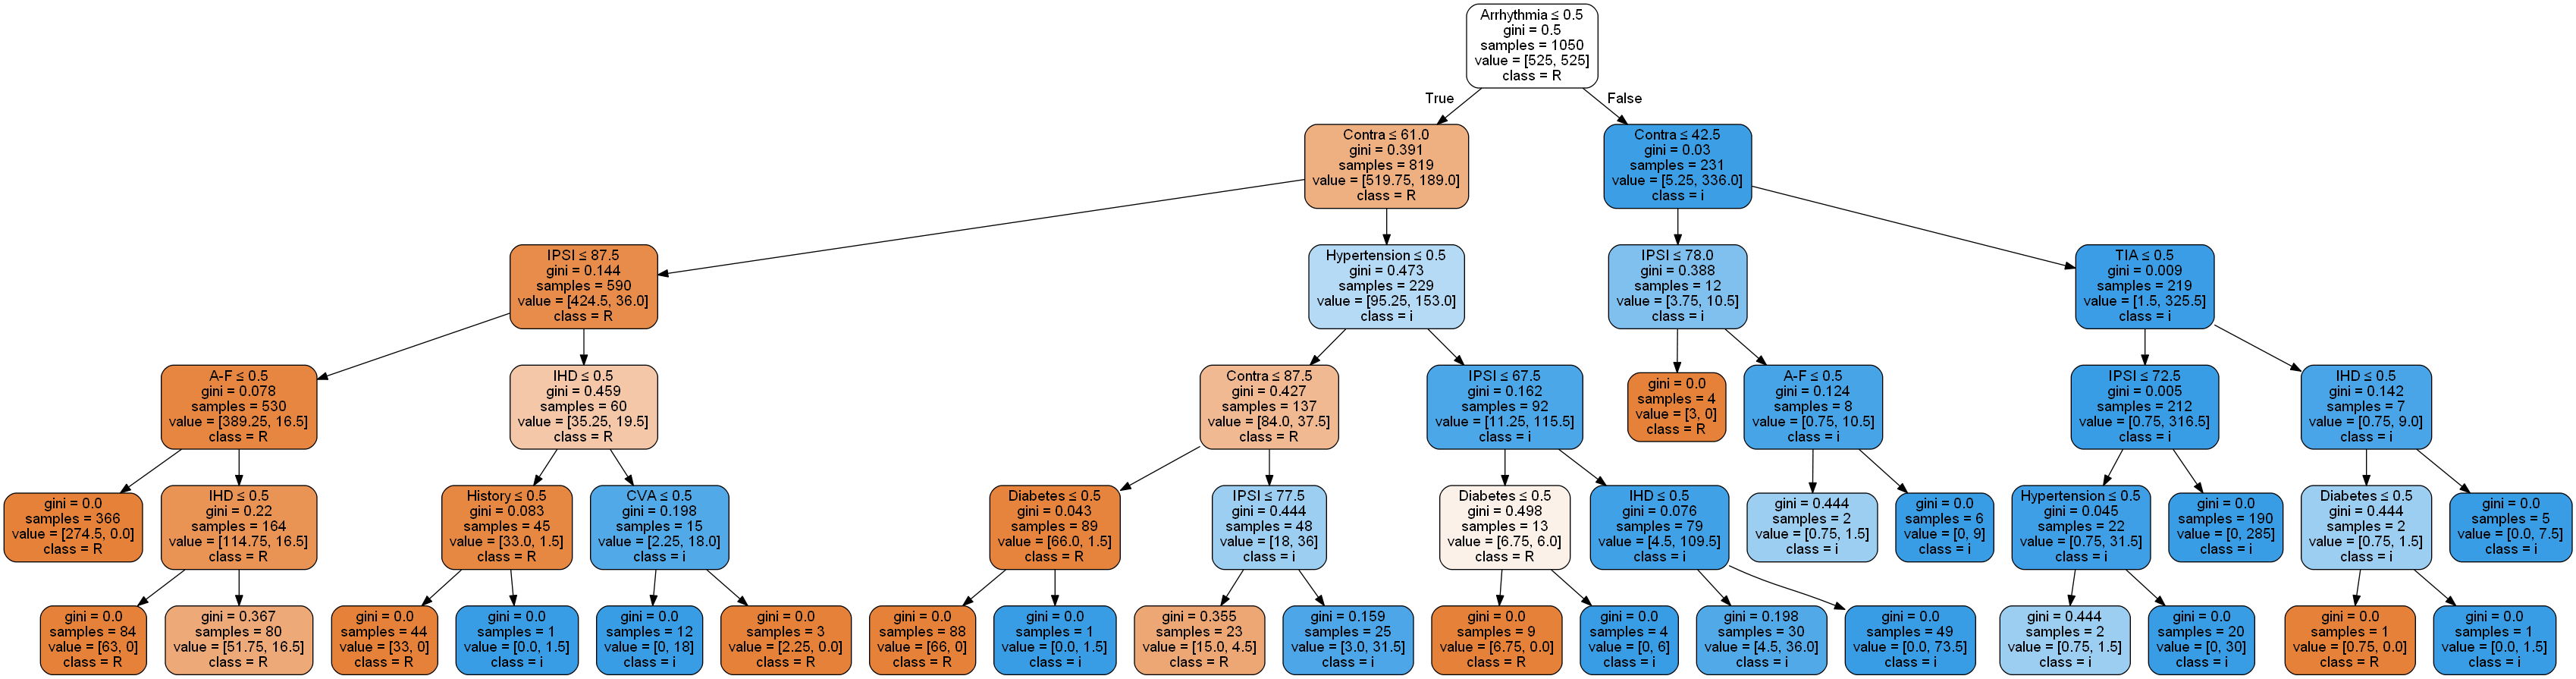

In [63]:
#Plot Decision Tree
plot_decision_tree(DecisionTreeModel,xTrain.columns,yTrain.columns[0])

Model then can predict the results of y depending on the x data it has been given.

Predictions are then stored in this dataframe as an example of what the model has predicted

In [64]:
yPredictDecisionTree = DecisionTreeModel.predict(xTest) #Predict y data using Model
YtestarrayDecisionTree = yTest.to_numpy().flatten() #create arrays of data

#place data into a dataframe 
DescisionTreePrediction = pd.DataFrame({'Actual': YtestarrayDecisionTree, 'Predicted': yPredictDecisionTree})
DescisionTreePrediction.head()#Show the top 5 Results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


Model Accuracy, Cross Validation Accuracy and Cross Validation Variance

In [65]:
#Sklearn Cross_Val_score documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

DecisionTreeCrossVal = cross_val_score(DecisionTreeModel,ModelCopy , MedicalRecordsRiskArray.flatten(), cv=10) #get kfold results
DecisionTreeAccuracy = accuracy_score(YtestarrayDecisionTree, yPredictDecisionTree)
print("Accuracy of Decision Tree:",round(DecisionTreeAccuracy,2))
print ("Cross Validation Accuracy Score(Decision Tree):" ,round(np.average(DecisionTreeCrossVal),2)) #Print accuracy score
print("Cross Validation Varience(Decision Tree): ",round(DecisionTreeCrossVal.std()*2,2),"\n") #print standard deviation

Accuracy of Decision Tree: 0.97
Cross Validation Accuracy Score(Decision Tree): 0.97
Cross Validation Varience(Decision Tree):  0.03 



Predict the values using Cross Validation

In [66]:
#sklearn cross_val_predict documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

yPredCrossValDecisionTree = cross_val_predict(DecisionTreeModel, xTest, YtestarrayDecisionTree, cv=10) #predict using model and kfolds

Confusion matrix, without normalization
[[291   9]
 [  5 145]]


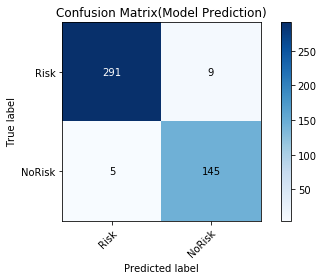

In [67]:
plot_confusion_matrix(YtestarrayDecisionTree, yPredictDecisionTree, classes=classes, title='Confusion Matrix(Model Prediction)')

Confusion matrix, without normalization
[[284  16]
 [  8 142]]


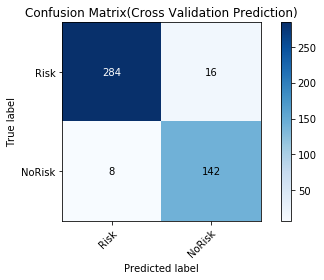

In [68]:

#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree, classes=classes, title='Confusion Matrix(Cross Validation Prediction)')
#ConfusionDecisionTree = confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree)

Get the classification report for the Decision Tree

In [69]:
print("Model Prediction\n")

DecisionTreeReportNormal = classification_report(YtestarrayDecisionTree, yPredictDecisionTree) #generate classicatioin report
print(DecisionTreeReportNormal)

Model Prediction

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       300
           1       0.94      0.97      0.95       150

    accuracy                           0.97       450
   macro avg       0.96      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [70]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("Cross Validation Prediction\n")

DecisionTreeReport = classification_report(YtestarrayDecisionTree, yPredCrossValDecisionTree) #generate classicatioin report
print(DecisionTreeReport)

Cross Validation Prediction

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       300
           1       0.90      0.95      0.92       150

    accuracy                           0.95       450
   macro avg       0.94      0.95      0.94       450
weighted avg       0.95      0.95      0.95       450



## Neural Network

A neural network uses all the inputs of the data supplied and assigns it a value these values are then sent to the first layer and calculated by timesing the value by the weight to get to a result. if the result times by the weight reaches the required threshold it will fire, and the next neuron will do the same until the network comes to a conclusion. A neural network can have many layers of many neurons that can feed into another layer until it comes to that conclusion

![ImageofNeuralNetwork ](https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-diagram.jpg)

Model is created

Hyperparameters Tweaked: 
    
    
Hyperparameters Results:

In [71]:
#Neural Network Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

YtestarrayNeuralNetwork = yTest.to_numpy().flatten() 
YtrainarrayNeuralNetwork = yTrain.to_numpy().flatten() 

#Create a neural Network Classifier 
NeuralNetworkModel = MLPClassifier(solver ='sgd',activation='logistic',max_iter=5000)

Model is trained on 70% of the data (Train data set) 

In [72]:
#Train the neural network
NeuralNetworkModel.fit(xTrain,YtrainarrayNeuralNetwork)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Model then can predict the results of y depending on the x data it has been given.

Predictions are then stored in this dataframe as an example of what the model has predict

In [73]:
yPredictNeuralNetwork = NeuralNetworkModel.predict(xTest) #Predict y data using Model
YtestarrayNeuralNetwork = yTest.to_numpy().flatten() #create arrays of data

#place data into a dataframe 
NeuralNetworkPrediction = pd.DataFrame({'Actual': YtestarrayNeuralNetwork, 'Predicted': yPredictNeuralNetwork})
NeuralNetworkPrediction.head()#Show the top 5 Results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


Model Accuracy, Cross Validation Accuracy and Cross Validation Variance

In [74]:
#Sklearn Cross_Val_score documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

NeuralNetworkAccuracy = accuracy_score(yTest ,yPredictNeuralNetwork)
NeuralNetworkCrossVal = cross_val_score(NeuralNetworkModel,ModelCopy , MedicalRecordsRiskArray.flatten(), cv=10)

print("Neural Network Accuracy Score",round(NeuralNetworkAccuracy,2))
print("Cross Validation Accuracy Score(Neural Network):" ,round(np.average(NeuralNetworkCrossVal),2))
print("Cross Validation variation (Neural Network): ",round(NeuralNetworkCrossVal.std()*2,2),"\n")

Neural Network Accuracy Score 0.87
Cross Validation Accuracy Score(Neural Network): 0.92
Cross Validation variation (Neural Network):  0.06 



Cross Validation prediction generated 

In [75]:
#sklearn cross_val_predict documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

yPredCrossValNeuralNetwork = cross_val_predict(NeuralNetworkModel, xTest, YtestarrayNeuralNetwork, cv=10)

Confusion matrix, without normalization
[[265  35]
 [ 25 125]]


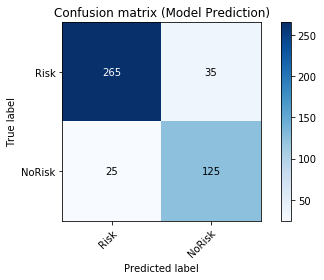

In [76]:
plot_confusion_matrix(YtestarrayNeuralNetwork, yPredictNeuralNetwork, classes=classes, title='Confusion matrix (Model Prediction)')

Confusion matrix, without normalization
[[250  50]
 [ 42 108]]


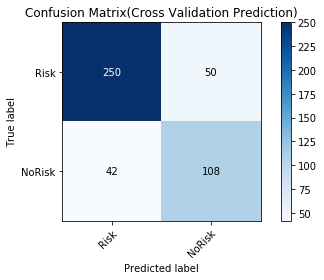

In [77]:
#plot confusion matrix based on Predicted data and real data, Normalised
plot_confusion_matrix(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork, classes=classes, title='Confusion Matrix(Cross Validation Prediction)')

Generate Classification Reports for Neural Network

In [78]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Model Prediction")

NeuralNetworkReportNormal = classification_report(YtestarrayNeuralNetwork, yPredictNeuralNetwork)
print(NeuralNetworkReportNormal)

Model Prediction
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       300
           1       0.78      0.83      0.81       150

    accuracy                           0.87       450
   macro avg       0.85      0.86      0.85       450
weighted avg       0.87      0.87      0.87       450



In [79]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Cross Validation Prediction")

NeuralNetworkReport = classification_report(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork)
print(NeuralNetworkReport)

Cross Validation Prediction
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       300
           1       0.68      0.72      0.70       150

    accuracy                           0.80       450
   macro avg       0.77      0.78      0.77       450
weighted avg       0.80      0.80      0.80       450



## SVC

SVC Works by drawing a line between the two options (Risk and No Risk) to find the points where something is classified as a risk or not. if a data point is above the line it could be a risk if it is below it could be no risk. The model built tries to place this line in the best position.

![ImageofSVC](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)

Model is created

Hyperparameters Tweaked: 
    
    
Hyperparameters Results:

In [80]:
#Sklearn SVC Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
SVCModel = SVC(gamma='auto',kernel = 'linear')

Model is trained on 70% of the data (Train data set) 

In [81]:
YtrainarraySVC = yTrain.to_numpy().flatten() #create arrays of data
SVCModel.fit(xTrain, YtrainarraySVC) #fit the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model then can predict the results of y depending on the x data it has been given.

Predictions are then stored in this dataframe as an example of what the model has predict

In [82]:
yPredictSVC = SVCModel.predict(xTest) #Predict y data using Model
YtestarraySVC = yTest.to_numpy().flatten() #create arrays of data

#place data into a dataframe 
SVCPrediction = pd.DataFrame({'Actual': YtestarraySVC, 'Predicted': yPredictSVC})
SVCPrediction.head()#Show the top 5 Results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


Model Accuracy, Cross Validation Accuracy and Cross Validation Variance


In [83]:
#Sklearn Cross_Val_score documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

SVCAccuracy = accuracy_score(YtestarraySVC, yPredictSVC)
SVCCrossVal = cross_val_score(SVCModel,ModelCopy, MedicalRecordsRiskArray.flatten(), cv=10) #find the results using kfold validation

print("SVC Accuracy",round(SVCAccuracy,2))
print("Cross Validation Accuracy Score(SVC):" ,round(np.average(SVCCrossVal),2)) #print accuracy
print("Cross Validation Varience(SVC): ",round(SVCCrossVal.std()*2,2),"\n")#Print standard deviation

SVC Accuracy 0.96
Cross Validation Accuracy Score(SVC): 0.97
Cross Validation Varience(SVC):  0.03 



Generate Cross Validation Predictions

In [84]:
#sklearn cross_val_predict documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
yPredCrossValSVC = cross_val_predict(SVCModel, xTest, YtestarraySVC, cv=10)#predict values using model and kfolds

Confusion matrix, without normalization
[[291   9]
 [  9 141]]


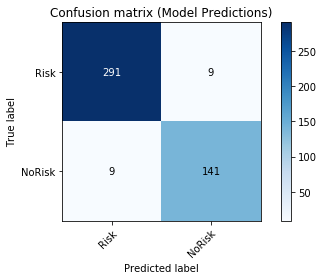

In [85]:
plot_confusion_matrix(YtestarraySVC, yPredictSVC, classes=classes, title='Confusion matrix (Model Predictions)')

Confusion matrix, without normalization
[[294   6]
 [  9 141]]


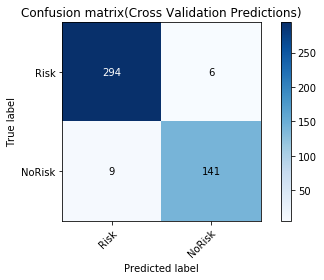

In [86]:
#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarraySVC, yPredCrossValSVC, classes=classes, title='Confusion matrix(Cross Validation Predictions)')

Generate Classifcation Report for SVC

In [87]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Model Prediction\n")

#generate classifaction report
SVCReportNormal = classification_report(YtestarraySVC, yPredictSVC)
print(SVCReportNormal)

Model Prediction

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.94      0.94      0.94       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



In [88]:
#sklearn classification report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Cross Validation Prediction\n")

#generate classifaction report
SVCReport = classification_report(YtestarraySVC, yPredCrossValSVC)
print(SVCReport)

Cross Validation Prediction

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       300
           1       0.96      0.94      0.95       150

    accuracy                           0.97       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.97      0.97       450



# Evaluation

In this section all of the stats  collected from the models are collated and compared to select the best model for the classification. Extra statistics are generated such as the null accuracy to compare the independent models to. 

### Null Accuracy

The Null accuracy is the accuracy of a model that always predicted 0 (Dumb Model) if a model is the percentage is a bad model if its higher its doing a good job (should be higher) 

In [89]:
YtestarrayNullAcc = yTest.to_numpy().flatten() #create arrays of data
print('Null Accuracy: ',round(max(YtestarrayNullAcc.mean(), 1 - YtestarrayNullAcc.mean()),2)) #print null accuracy

Null Accuracy:  0.67


## Cross Validation Accuracy/Standard Deviation Score

Accuracy Scores collated from the models are compared. 

As you can see ___ Model is performing the best out of all of the other models followed by __,__,___ and all manage to beat the null accuracy score meaning the models are working better than a dumb model. 


In [90]:
print("Accuracy of Model (Logistic Regression)",LogisticRegressionAccuracy)
print ("Cross Validation Accuracy Score(Logistic Regression):" ,round(np.average(LogisticRegressionCrossVal),2))
print("Cross Validation Varience(Logistic Regression): ",round(LogisticRegressionCrossVal.std()*2,2),"\n")

print("Accuracy of Decision Tree:",round(DecisionTreeAccuracy,2))
print ("Cross Validation Accuracy Score(Decision Tree):" ,round(np.average(DecisionTreeCrossVal),2))
print("Cross Validation Varience(Decision Tree): ",round(DecisionTreeCrossVal.std()*2,2),"\n")

print("Neural Network Accuracy Score",round(NeuralNetworkAccuracy,2))
print("Cross Validation Accuracy Score(Neural Network):" ,round(np.average(NeuralNetworkCrossVal),2))
print("Cross Validation Varience(Neural Network): ",round(NeuralNetworkCrossVal.std()*2,2),"\n")

print("SVC Accuracy:",round(SVCAccuracy,2))
print("Cross Validation Accuracy Score(SVC):" ,round(np.average(SVCCrossVal),2))
print("Cross Validation Varience(SVC): ",round(SVCCrossVal.std()*2,2),"\n")

Accuracy of Model (Logistic Regression) 0.9555555555555556
Cross Validation Accuracy Score(Logistic Regression): 0.98
Cross Validation Varience(Logistic Regression):  0.04 

Accuracy of Decision Tree: 0.97
Cross Validation Accuracy Score(Decision Tree): 0.97
Cross Validation Varience(Decision Tree):  0.03 

Neural Network Accuracy Score 0.87
Cross Validation Accuracy Score(Neural Network): 0.92
Cross Validation Varience(Neural Network):  0.06 

SVC Accuracy: 0.96
Cross Validation Accuracy Score(SVC): 0.97
Cross Validation Varience(SVC):  0.03 



## Confusion Matrixes

Confusion Matrixes can then be plotted to see how the model performed. False negative values are the worst as if a model predicts someone doesn't have cancer and they actually do then our model could have resulted in someone dying.

From these results I can see how many results a model gets wrong and the severity it gets wrong

Logistic Regression Predicts --- Wrong and has --- False Positives 
Decision Tree Predicts --- Wrong and has --- False Positives
Neural Network Predicts --- Wrong and has --- False Positives
SVC Predicts --- Wrong and has --- False Positives

From Confusion Matrixes alone --- Model is performing the best followed by ---, --- , ---

![ConfusionMatrix](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

Confusion matrix, without normalization
[[287  13]
 [  5 145]]
Confusion matrix, without normalization
[[288  12]
 [  8 142]]
Confusion matrix, without normalization
[[284  16]
 [  8 142]]
Confusion matrix, without normalization
[[291   9]
 [  5 145]]
Confusion matrix, without normalization
[[250  50]
 [ 42 108]]
Confusion matrix, without normalization
[[265  35]
 [ 25 125]]
Confusion matrix, without normalization
[[294   6]
 [  9 141]]
Confusion matrix, without normalization
[[291   9]
 [  9 141]]


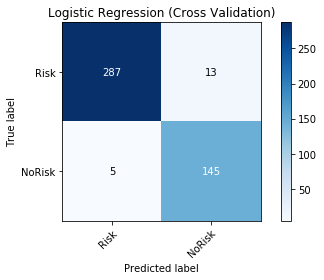

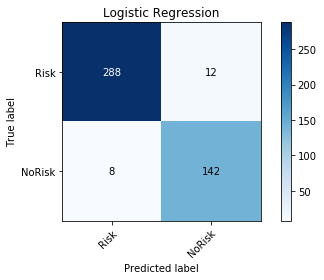

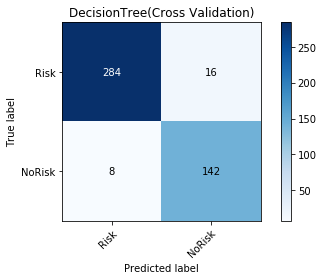

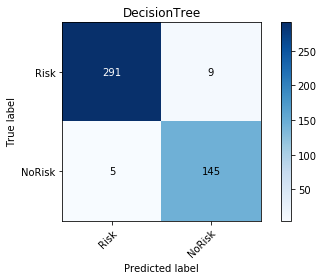

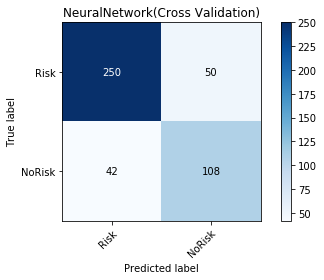

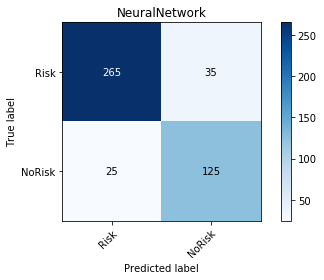

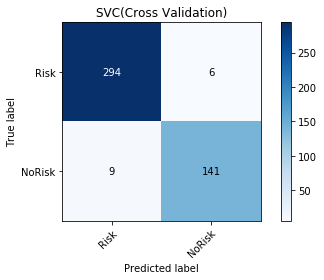

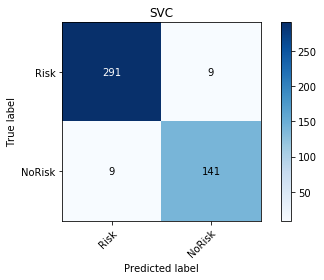

In [91]:
plot_confusion_matrix(YtestarrayLogisticRegression, yPredCrossValLogisticRegression, classes=classes, title='Logistic Regression (Cross Validation)')
plot_confusion_matrix(YtestarrayLogisticRegression, yPredtestLogisticRegression, classes=classes, title='Logistic Regression')

plot_confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree, classes=classes, title='DecisionTree(Cross Validation)')
plot_confusion_matrix(YtestarrayDecisionTree, yPredictDecisionTree, classes=classes, title='DecisionTree')

plot_confusion_matrix(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork, classes=classes, title='NeuralNetwork(Cross Validation)')
plot_confusion_matrix(YtestarrayDecisionTree, yPredictNeuralNetwork, classes=classes, title='NeuralNetwork')

plot_confusion_matrix(YtestarraySVC, yPredCrossValSVC, classes=classes, title='SVC(Cross Validation)')
plot_confusion_matrix(YtestarraySVC, yPredictSVC, classes=classes, title='SVC')

## Classification Report

You can also use the predicted data to find the precision value (how many times the model correctly predicts a positive value out of all the positive values) and the recall value ( how many times the model gets something right through all the data)

This additionally generates F1-score which is the average of both of the precision and recall values.

From these values you can use F1-Score to judge how well the model is predicting the values 

Model __ has the best F1-Score meaning that it is performing the best in this test followed by --,--,--



In [92]:
print("Logistic Regression Model Prediction\n")
print(LogisticRegressionReportNormal)
print("Logistic Regression Cross Validation Prediction\n")
print(LogisticRegressionReport)
print("SVC Model Prediction\n")
print(SVCReportNormal)
print("SVC Cross Validation Prediction\n")
print(SVCReport)
print("Neural Network Model Prediction\n")
print(NeuralNetworkReportNormal)
print("Neural Network Cross Validation Prediction\n")
print(NeuralNetworkReport)
print("Decision Tree Model Prediction\n")
print(DecisionTreeReportNormal)
print("Decision Tree Cross Validation Prediction\n")
print(DecisionTreeReport)

Logistic Regression Model Prediction

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       300
           1       0.92      0.95      0.93       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450

Logistic Regression Cross Validation Prediction

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.92      0.97      0.94       150

    accuracy                           0.96       450
   macro avg       0.95      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

SVC Model Prediction

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.94      0.94      0.94       150

    accuracy                           0.96       450
   macro avg       

## Conclusion